# Assignment 2

## André Dias (59452); Tiago Rodrigues (49593)

In [1]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as cl
from sklearn import svm, datasets
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split

In [2]:
# Functions

def CreateMesh(X, y):
    x_min, x_max = X_new[:, 0].min() - 1, X_new[:, 0].max() + 1
    y_min, y_max = X_new[:, 1].min() - 1, X_new[:, 1].max() + 1
    h = (x_max / x_min) / 100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy, x_min, x_max

# Problem 4

If you remove a few support vectors and re-trained the SVM, what should happen to the decision boundary?

Verify your original assumptions by removing a few support vectors from the dataset, training a new SVM and comparing the obtained solution to the previous one.

#### As this exercise follows problem 3, which required the utilization of a polynomial kernel, this kernel was firstly tested:

In [3]:
# Import iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

### Polynomial Kernel

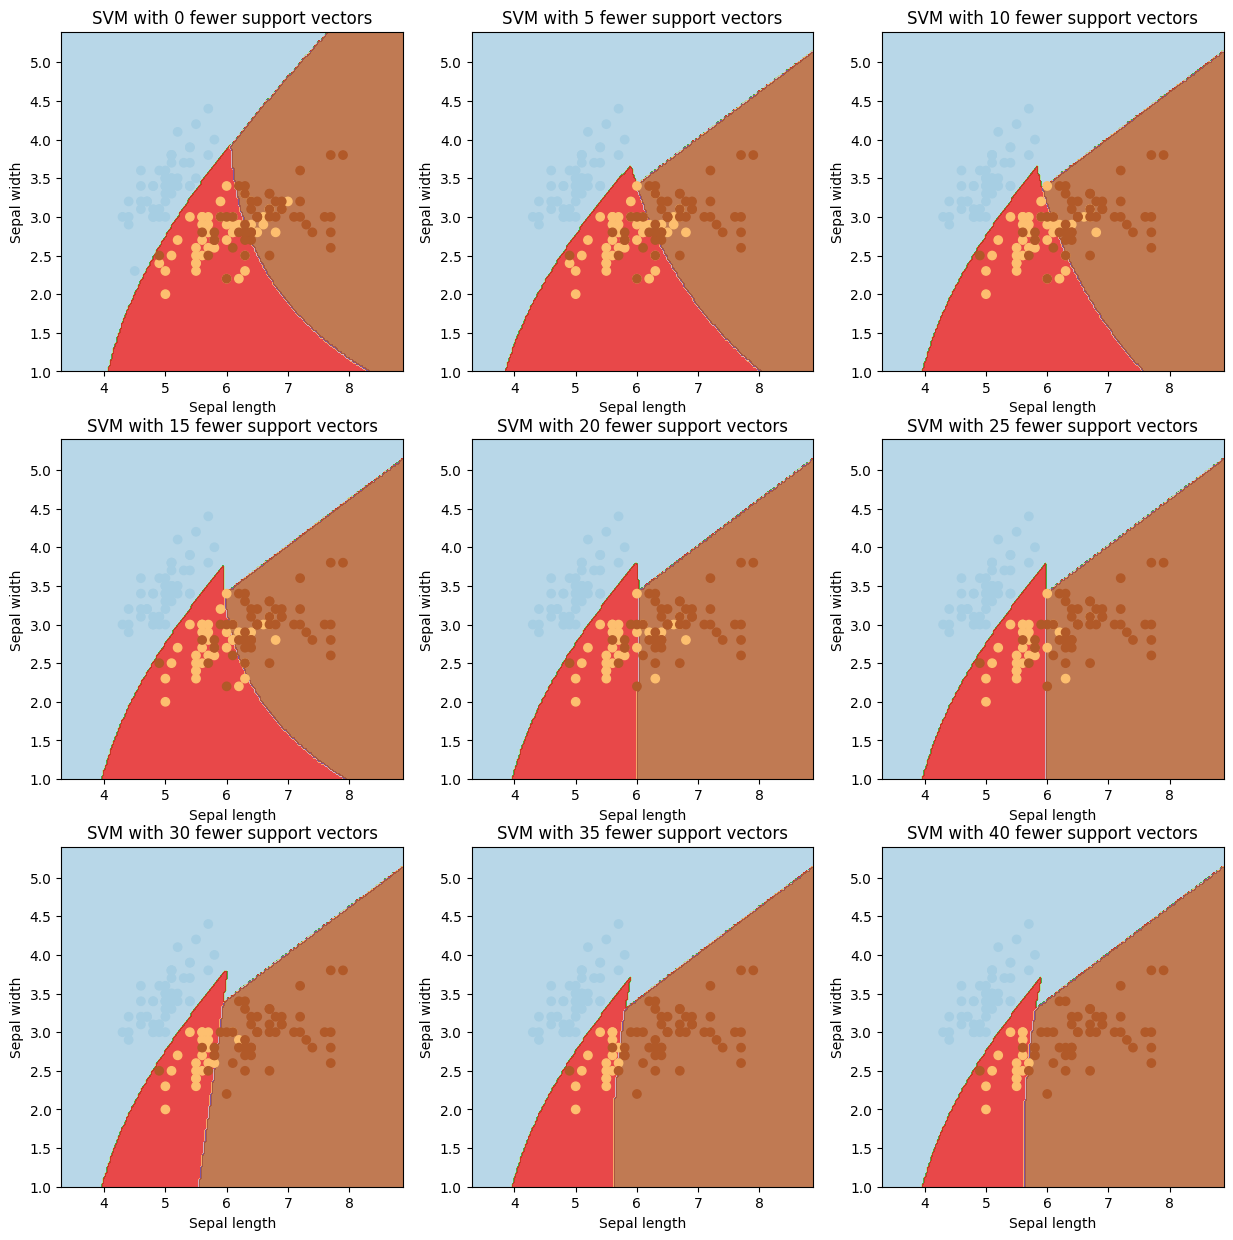

In [4]:
# Train SVM with all support vectors
svc_all = svm.SVC(kernel = 'poly').fit(X, y)

# Get the indices of the support vectors
support_indices = svc_all.support_

# Range of support vectors to remove
support_to_remove = range(0, 41, 5)

# Plot the decision boundaries for different numbers of support vectors
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 15))

for i, s in enumerate(support_to_remove):
    row = i // 3
    col = i % 3
    
    # Remove chosen number of support vectors
    indices_to_remove = support_indices[:s]
    X_new = np.delete(X, indices_to_remove, axis = 0)
    y_new = np.delete(y, indices_to_remove)
    
    # Train SVM with fewer support vectors
    svc_new = svm.SVC(kernel = 'poly').fit(X_new, y_new)

    # Plot SVM decision boundary
    xx, yy, x_min, x_max = CreateMesh(X, y)
    Z = svc_new.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax = axes[row, col]
    ax.contourf(xx, yy, Z, cmap = plt.cm.Paired, alpha = 0.8)
    ax.scatter(X_new[:, 0], X_new[:, 1], c = y_new, cmap = plt.cm.Paired)
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_title('SVM with {} fewer support vectors'.format(s))
    
plt.show()

Support vectors are data points that are critical in defining the decision boundary of an SVM classifier. The decision boundary is a hyperplane that separates different classes in the feature space. If we remove support vectors from the dataset, it means we are removing critical data points that define the decision boundary.

Therefore, if we remove some support vectors, the decision boundary will be adjusted to accommodate the new support vectors. This could change the margin between the decision boundary and the support vectors, which may lead to misclassification of some data points.

In the code above, the loop removes some support cectors starting from 0 to 40 in increments of 5 (i.e., 0, 5, 10, 15...). It then trains SVM classifiers using the reduced dataset and plots the decision boundaries for different numbers of support vectors. As the number of support vectors is decreased, the decision boundary is formed taking into consideration fewer number of remaining support vectors which may affect the decision boundary and it's margin.

As seen in the plots, the decision boundary changes according to the number of support vectors removed. This idea can be more evident in the decision boundary between the red and brown areas which show that it is clearly affected as more support vectors are removed.

Since the linear kernel allows a more extensive exploration of what happens to the margins when support vectors are removed, this kernel was tested next:

### Linear Kernel

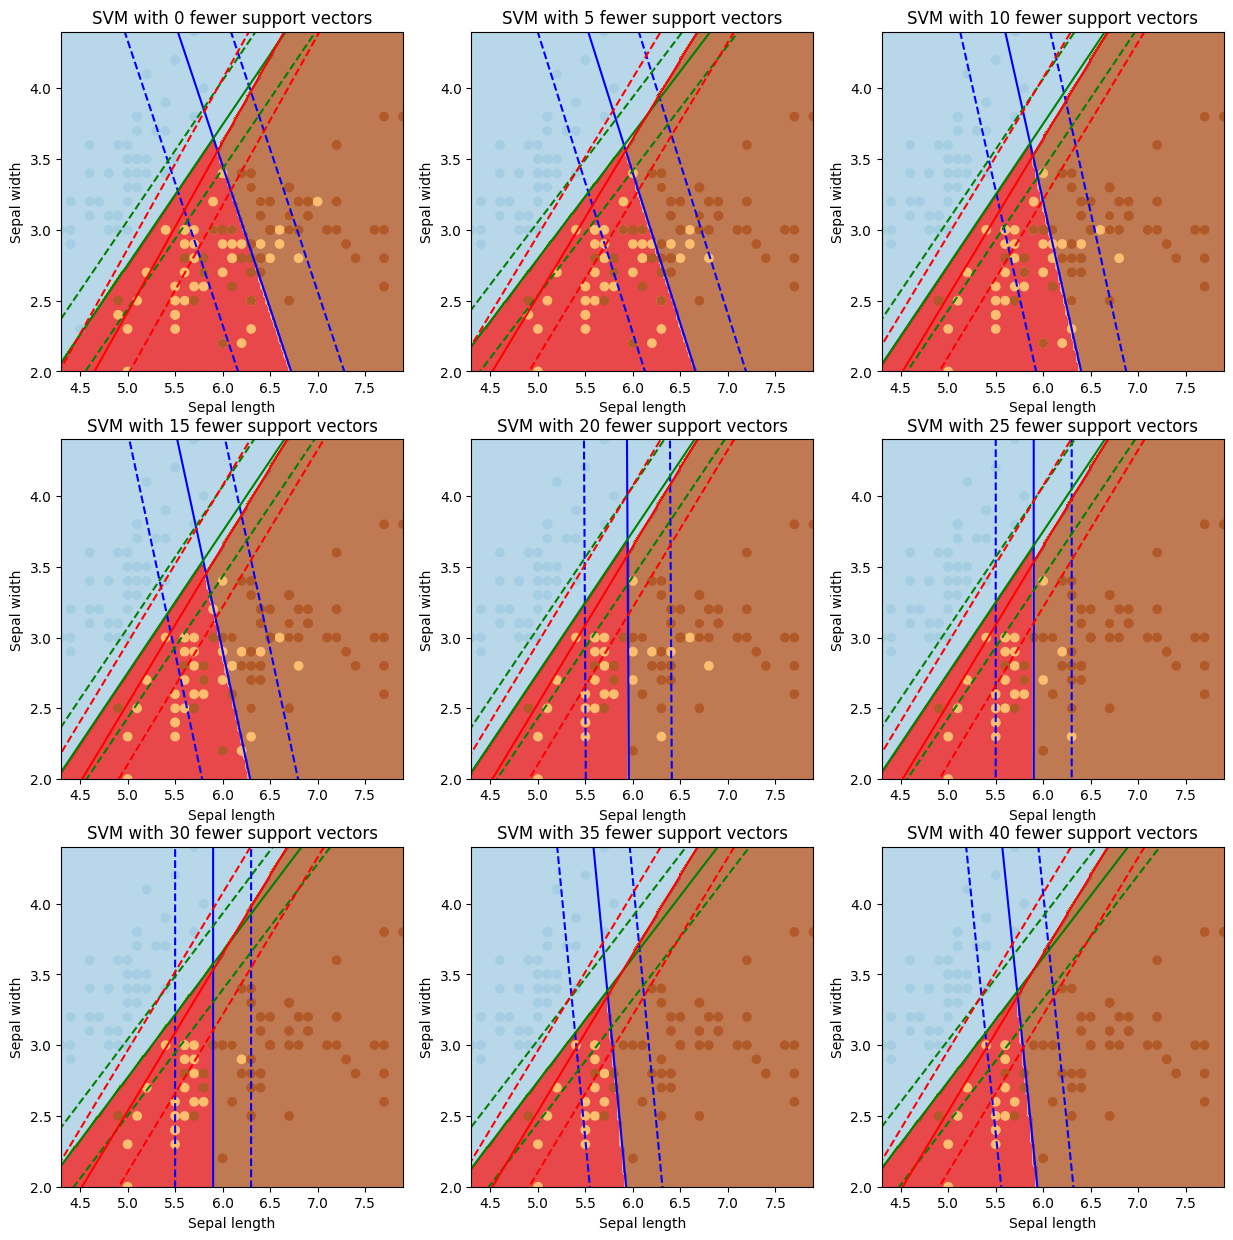

Text(0.5, 1.0, 'Margin variation according to the number of removed support vectors')

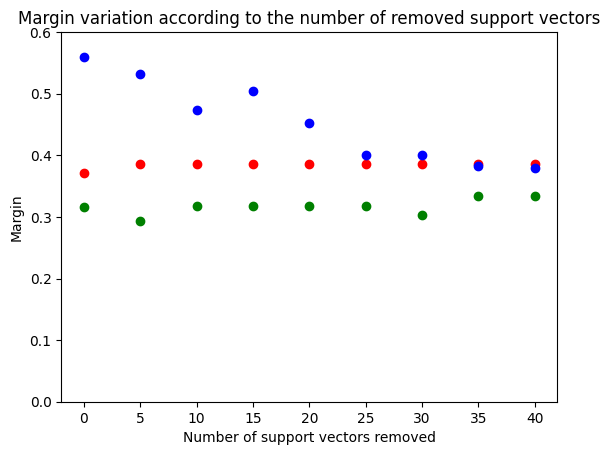

In [5]:
# Create the plot space for plotting the decision boundaries for different numbers of support vectors
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 15))

# Create margins list for each of the 3 decision boundaries
model_margin_1 = []
model_margin_2 = []
model_margin_3 = []

# Get results when removing different number of support vectors (0, 5, 10, ..., 40)
for i, s in enumerate(support_to_remove):
    row = i // 3
    col = i % 3
    
    # Remove chosen number of support vectors
    indices_to_remove = support_indices[:s]
    X_new = np.delete(X, indices_to_remove, axis = 0)
    y_new = np.delete(y, indices_to_remove)
    
    # Train SVM with chosen number of support vectors to remove
    svc_new = svm.SVC(kernel = 'linear').fit(X_new, y_new)
    
    # Append margin of the current model to the respective margin list
    model_margin_1.append(1 / np.sqrt(np.sum(svc_new.coef_[0] ** 2)))
    model_margin_2.append(1 / np.sqrt(np.sum(svc_new.coef_[1] ** 2)))
    model_margin_3.append(1 / np.sqrt(np.sum(svc_new.coef_[2] ** 2)))
    
    # Plot SVM decision boundary
    xx, yy, x_min, x_max = CreateMesh(X, y)
    Z = svc_new.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax = axes[row, col]
    ax.contourf(xx, yy, Z, cmap = plt.cm.Paired, alpha = 0.8)
    ax.scatter(X_new[:, 0], X_new[:, 1], c = y_new, cmap = plt.cm.Paired)
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_title('SVM with {} fewer support vectors'.format(s))
    
    # Plot support vector lines for all three classes
    for i, color in zip(svc_new.classes_, 'bgr'):
        mask = (y_new == i)
        w = svc_new.coef_[i - 1]
        a = -w[0] / w[1]
        xx_support = np.linspace(x_min, x_max)
        yy_support = a * xx_support - (svc_new.intercept_[i - 1]) / w[1]
        margin = 1 / np.sqrt(np.sum(w ** 2))
        gutter_up = yy_support + a * margin
        gutter_down = yy_support - a * margin
        ax.plot(xx_support, yy_support, color + '-')
        ax.plot(xx_support, gutter_up, color + '--')
        ax.plot(xx_support, gutter_down, color + '--')
        ax.set_xlim(np.min(X_new[:, 0]), np.max(X_new[:, 0]))
        ax.set_ylim(np.min(X_new[:, 1]), np.max(X_new[:, 1]))
plt.show()

# Plot the margins of the 3 separation planes, according to the number of removed support vectors
plt.figure()
plt.scatter(support_to_remove, model_margin_1, c = 'g')
plt.scatter(support_to_remove, model_margin_2, c = 'r')
plt.scatter(support_to_remove, model_margin_3, c = 'b')
plt.ylim(0, 0.6)
plt.xlabel('Number of support vectors removed')
plt.ylabel('Margin')
plt.title('Margin variation according to the number of removed support vectors')

As seen in the plots, in the case of using a linear kernel, the decision boundary also changes according to the number of support vectors removed.

Futhermore, by using the linear kernel, the separating hyperplanes and their margins can be more represented with more detail.

Through the plotting of the margins against the number of removed vectors, one can observe how the margins change as we remove some support vectors from the model. It is possible to visualize that there are three classes in the scatterplot which show this relationship (blue = boundary between red and brown classes; red = boundary between blue and brown classes; green = boundary between blue and red classes). Analysing the results, it is possible to observe that the blue dots show a decrease in the in margins as we remove more support vectors. This makes sense since this class corresponds to the area between red and brown which shows a more drastic change to the removal of support vectors. The remaining classes don't show significant changes to their margins as we remove support vectors. This could happen if the removed support vectors are redundant, which may occur if there are many others that would lead to the formation of that same boundary.

An additional plot that represents the margins, coloured according to the previously mentioned separating hyperplanes, as a function of the number of removed support vectors was made. From this plot, it is also possible to visualize that for the decision boundary of the support vectors for the brown and red areas, the more support vectors that are removed, the smaller margin between them. The margin size depends on the nearest points to the hyperplane, which are the support vectors. When we remove some support vectors, it removes the points closest to the hyperplane, causing the boundary's location to shift, and the margin to decrease. It's also possible to assess that the other margins were not severely affected.

# Problem 5

Optimize the C and gamma hyperparameters using grid search with cross validation of 5 folds.
How does the performance compare to base values? Tip: remember to split the dataset into a
train and test split, so you can test on an isolated section of the data.

For the default model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.75      0.75      0.75        12
           2       0.67      0.67      0.67         9

    accuracy                           0.84        38
   macro avg       0.81      0.81      0.81        38
weighted avg       0.84      0.84      0.84        38

[[17  0  0]
 [ 0  9  3]
 [ 0  3  6]]

For the tunned model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.75      0.75      0.75        12
           2       0.67      0.67      0.67         9

    accuracy                           0.84        38
   macro avg       0.81      0.81      0.81        38
weighted avg       0.84      0.84      0.84        38

[[17  0  0]
 [ 0  9  3]
 [ 0  3  6]]


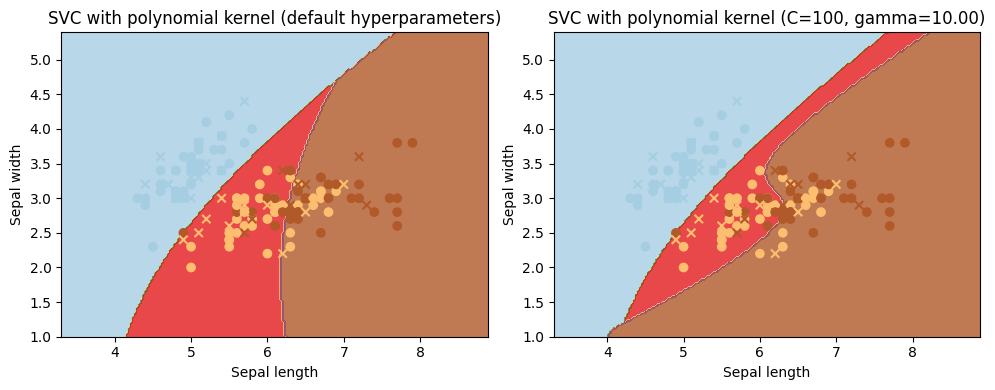

In [6]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1998)

# Create a mesh to plot in
xx, yy, x_min, x_max = CreateMesh(X, y)

# Create a SVM with polynomial kernel and default hyperparameters
svc_default = svm.SVC(kernel = 'poly').fit(X_train, y_train)

# Predict on the meshgrid with the default SVM
Z_default = svc_default.predict(np.c_[xx.ravel(), yy.ravel()])
Z_default = Z_default.reshape(xx.shape)

# Define the hyperparameters to test
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100]}

# Create the GridSearchCV object
grid_search = GridSearchCV(svm.SVC(kernel = 'poly'), param_grid = param_grid, cv = 5).fit(X_train, y_train)

# Get the best hyperparameters
best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']

# Train a SVM with the best hyperparameters using the training data
svc_best = svm.SVC(kernel = 'poly', C = best_C, gamma = best_gamma).fit(X_train, y_train)

# Predict on the meshgrid with the best SVM
Z_best = svc_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z_best = Z_best.reshape(xx.shape)

# Calculate model evaluation metrics and confusion matrix of the default and tunned SVM on the test set
print('For the default model:')
print(classification_report(y_test, svc_default.predict(X_test)))
print(confusion_matrix(y_test, svc_default.predict(X_test)))

print('\nFor the tunned model:')
print(classification_report(y_test, svc_best.predict(X_test)))
print(confusion_matrix(y_test, svc_best.predict(X_test)))

# Plot the decision boundaries and the data points
plt.figure(figsize = (10, 4))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_default, cmap = plt.cm.Paired, alpha = 0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = plt.cm.Paired)
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = plt.cm.Paired, marker = 'x')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with polynomial kernel (default hyperparameters)')

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_best, cmap = plt.cm.Paired, alpha = 0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = plt.cm.Paired)
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = plt.cm.Paired, marker = 'x')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with polynomial kernel (C={}, gamma={:.2f})'.format(best_C, best_gamma))

plt.tight_layout()
plt.show()

In SVM's there are 2 commonly optimized parameters: C and Gamma. The C parameter corresponds to how much a misclassification is penalized in the model and, as such, a high C greatly penalizes misclassifications, leading to a model with low bias and high variance, while a low C may allow some misclassifications to occur, leading to a model with higher bias and lower variance. The Gamma parameter is only applied to kernels other than linear and corresponds to the distance a single data sample exerts influence, leading to different curvatures of the decision boundary. High Gamma leads to models with high bias and low variance and low Gamma the opposite.

In the above results the statistics of the default model and a tunned model, after applying hyperparameter optimization using grid search, are presented. Furthermore, their confusion matrixes and plots of the models with their separating hyperplanes are also shown. To note that in the plots, points that were used for training are presented as circles (X_train) and the points used for validation are presented as crosses (X_test).

From these results, it's possible to see that the grid search indicated that a C = 0.1 and Gamma = 10 led to the best results using the training set and 5-fold cross-validation. Despite this, when validating this tunned model with the independent validation set vs the default model, in which C = 1 and Gamma = "scale", the overall model accuracy stayed the same.

From the classification report, it's possible to identify that the yellow and brown points were classified differently, which led to distinct model statistics. In the tunned model, class 2 had better precision but worse recall and f1-score while class 3 had worse precision but better recall and f1-score. From the averages of these scores, it's possible to verify that the tunned model had slightly better precision and recall and slightly worse f1-score.

From the confusion matrix, it is possible to identify differences in missclassifications of class 2 and 3 elements. The tunned model had 2 more misclassifications of class 2 elements but it also had 2 less misclassifications of class 3 elements. These differences justify the different scores seen for these models.

The plots demonstrate the impact that the parameters can have on the separating planes of the models. The separating plane between the red and brown zones was severely impacted by the change in parameters in the tunned model.

Overall, the main conclusion of the model tunning is that, for this dataset using the polynomial kernel, hyperparameter tunning did not wield significantly better results. This could be partially attributed to the fact that SVMs are very robust and typically have an optimial solution, which could lead to a less significant impact of the parameters on the model quality.

# Problem 6

Do the practice problem from the resource by:
- finding the additional feature to have a hyper-plane that separates the classes;
- visualizing in 3D the separation of the data (since the actual point positions are not provided, use approximate coordinates for the blue star and red dot points);
- use the SVM classifier from scikit-learn, with different kernels, to solve the problem and compare it with the solution you had previously obtained.


To understand what kind of feature would meet the desired demands, the data had to firstly be plotted:

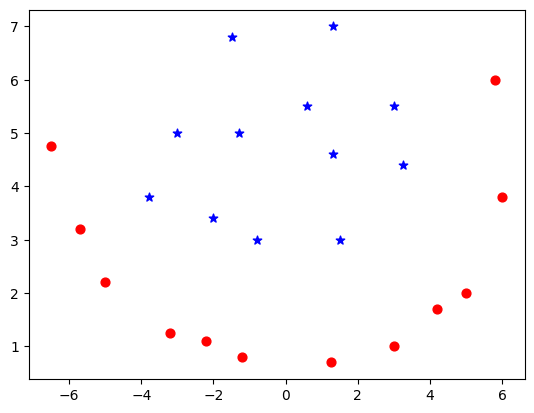

In [7]:
# Read the data
points = pd.read_csv('points.csv')

# Plot the data
plt.figure()
plt.scatter(points['x'][points['color'] == 'Red'], points['y'][points['color'] == 'Red'], s = 40, c = 'r')
plt.scatter(points['x'][points['color'] == 'Blue'], points['y'][points['color'] == 'Blue'], s = 40, c = 'b', marker = '*')

From a basic plot of the dataset, it becomes clear that the classes are not linearly separable. One methodology to overcome this is data transformation. In the SVM slides provided, a solution for a similar problem was to create a new feature that corresponded to the sum of the X squared and Y squared. In that dataset, the blue stars were centered around (0, 0). In this dataset, the blue stars are centered around (0, 5). As such, a new feature z was created which consisted in the sum of X squared and Y - 5 squared. Y - 5 should bring the center of the dataset to (0, 0), where the beforementioned proposed feature should work.

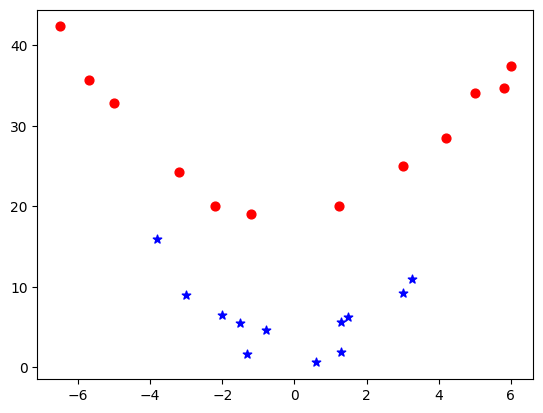

In [8]:
# Create new z variable
points['z'] = points['x']**2 + (points['y']-5)**2

# Plot data with new z variable
plt.figure()
plt.scatter(points['x'][points['color'] == 'Red'], points['z'][points['color'] == 'Red'], s = 40, c = 'r')
plt.scatter(points['x'][points['color'] == 'Blue'], points['z'][points['color'] == 'Blue'], s = 40, c = 'b', marker = '*')

From the plot of the X feature with z, it's possible to see that the classes seem to be linearly separable. As such, a SVM with a linear kernel was fitted to the data, from which the separating hyperplane was plotted.

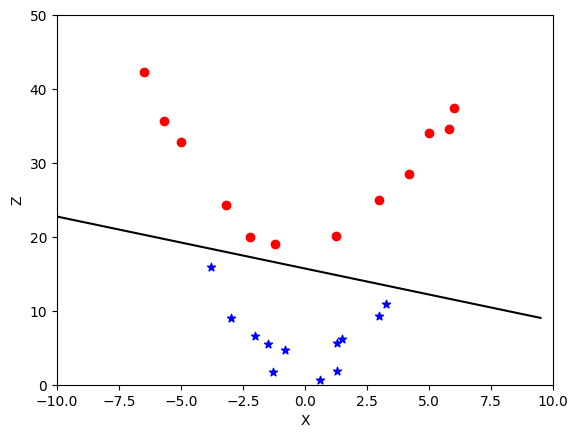

In [9]:
# Codify colour variable into new column "y_target", where Red = 0 and Blue = 1
points['y_target'] = points['color'].copy().replace(['Red'], 0).replace(['Blue'], 1)

# Create X and Y arrays
X = points[['x', 'z']].values
Y = points['y_target'].values

# Create the SVM classifier with a linear kernel
svc = svm.SVC(kernel = 'linear').fit(X, Y)

# Get the separating hyperplane
w = svc.coef_
b = svc.intercept_

# Create a meshgrid for the plot
xx, zz = np.meshgrid(np.arange(-10, 10, 0.5), np.arange(0, 200, 10))

# Create the separating hyperplane
yy = (-w[0][0] * xx - b) / w[0][1]

# Plot the data and hyperplane
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(points['x'][points['color'] == 'Red'], points['z'][points['color'] == 'Red'], c = 'r')
ax.scatter(points['x'][points['color'] == 'Blue'], points['z'][points['color'] == 'Blue'], c = 'b', marker = '*')
ax.plot(xx.ravel(), yy.ravel(), 'k-', alpha = 1)
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_xlim([-10, 10])
ax.set_ylim([0, 50])
plt.show()

As seen by this plot, the dataset was now linearly separable without any misclassifications.

The next step was to visualize the data separation in 3D.

<IPython.core.display.Javascript object>


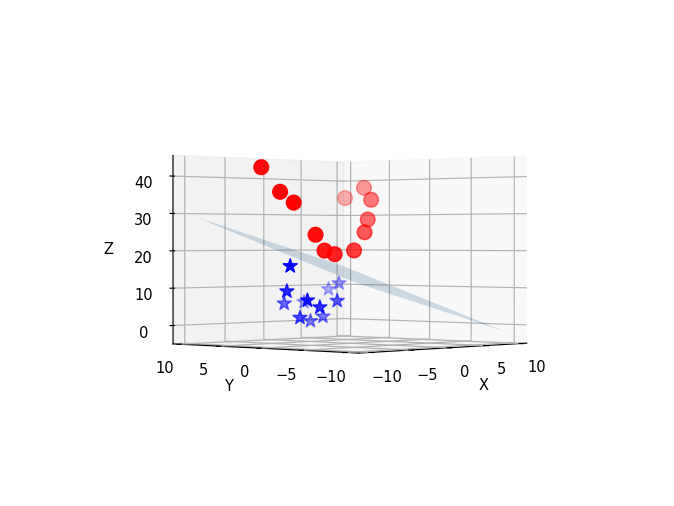

In [10]:
%matplotlib notebook

# Create X and Y arrays
X = points[['x', 'y', 'z']].values
Y = np.where(points['color'] == 'Red', 1, -1)

# Create the SVM classifier with a linear kernel
svc = svm.SVC(kernel = 'linear').fit(X, Y)

# Get the separating hyperplane
w = svc.coef_
b = svc.intercept_

# Create a meshgrid for the plot
xx, yy = np.meshgrid(np.arange(-10, 10, 0.5), np.arange(-10, 10, 0.5))
zz = (-w[0][0] * xx - w[0][1] * yy - b) / w[0][2]

# Plot the data and hyperplane
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(points['x'][points['color'] == 'Red'], points['y'][points['color'] == 'Red'], points['z'][points['color'] == 'Red'], s = 100, c = 'r')
ax.scatter(points['x'][points['color'] == 'Blue'], points['y'][points['color'] == 'Blue'], points['z'][points['color'] == 'Blue'], s = 100, c = 'b', marker = '*')
ax.plot_surface(xx, yy, zz, alpha = 0.2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

Once again, the plot showcases the clear separation of the data in 3D, when X, Y and z are considered. The separation between classes is very good and no misclassifications are registered.

Lastly, the original dataset was used for training SVM with different kernels (Linear, Polynomial, RBF and Sigmoidal). The data used for testing was the same as the one used for training, which under normal circunstances SHOULD NOT be done, but in this case it made sense, as it was desired to train the models with the full data and analyze the misclassifications made by the models on that same data.

C:\Users\atdia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\atdia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\atdia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\atdia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<IPython.core.display.Javascript object>


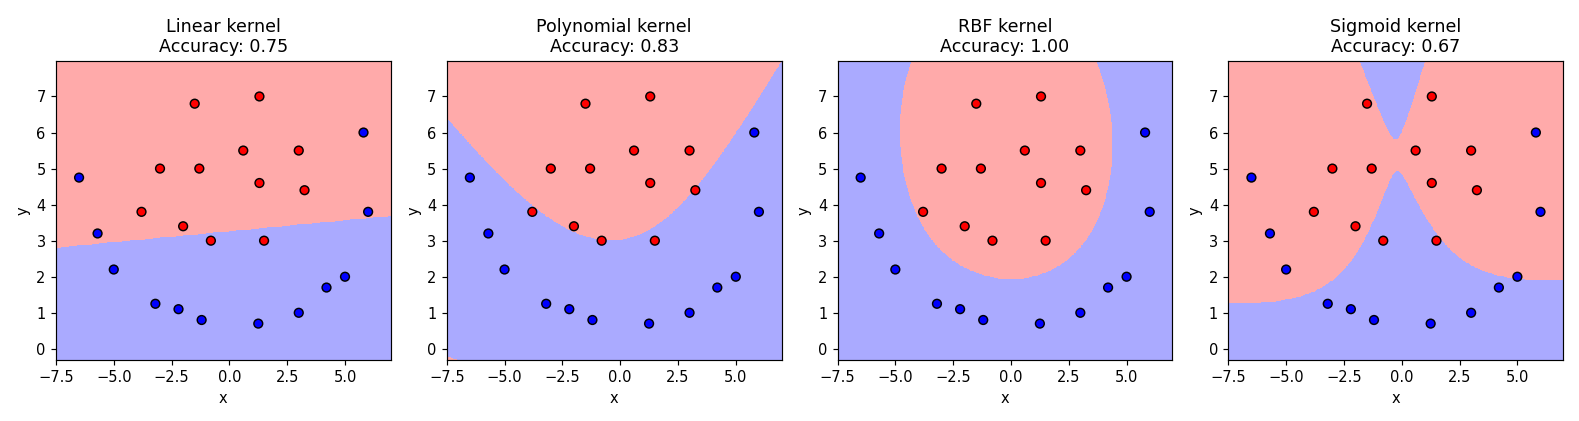

In [11]:
# Split data into training and testing sets
X_train = points[['x', 'y']]
y_train = points['y_target']
X_test = X_train
y_test = y_train

# Create SVM classifiers with different kernels
clf_linear = svm.SVC(kernel = 'linear').fit(X_train, y_train)
clf_poly = svm.SVC(kernel = 'poly').fit(X_train, y_train)
clf_rbf = svm.SVC(kernel = 'rbf').fit(X_train, y_train)
clf_sig = svm.SVC(kernel = 'sigmoid').fit(X_train, y_train)

# Predict labels for the test set
y_pred_linear = clf_linear.predict(X_test)
y_pred_poly = clf_poly.predict(X_test)
y_pred_rbf = clf_rbf.predict(X_test)
y_pred_sig = clf_sig.predict(X_test)

# Create a meshgrid of points to classify
h = 0.02
x_min, x_max = X_train['x'].min() - 1, X_train['x'].max() + 1
y_min, y_max = X_train['y'].min() - 1, X_train['y'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z_linear = clf_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)
Z_poly = clf_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z_poly = Z_poly.reshape(xx.shape)
Z_rbf = clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)
Z_sig = clf_sig.predict(np.c_[xx.ravel(), yy.ravel()])
Z_sig = Z_sig.reshape(xx.shape)

# Define color maps for each class label
cmap_light = cl.ListedColormap(['#AAAAFF', '#FFAAAA'])
cmap_bold = cl.ListedColormap(['#0000FF', '#FF0000'])

# Plot the decision boundaries for each classifier
fig, axs = plt.subplots(1, 4, figsize = (15, 4))
titles = ['Linear kernel', 'Polynomial kernel', 'RBF kernel', 'Sigmoid kernel']
Zs = [Z_linear, Z_poly, Z_rbf, Z_sig]
clfs = [clf_linear, clf_poly, clf_rbf, clf_sig]
for i in range(4):
    axs[i].pcolormesh(xx, yy, Zs[i], cmap = cmap_light)
    axs[i].scatter(X_train['x'], X_train['y'], c = y_train, cmap = cmap_bold, edgecolor = 'k')
    axs[i].set_xlim(xx.min(), xx.max())
    axs[i].set_ylim(yy.min(), yy.max())
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('y')
    axs[i].set_title(titles[i] + '\nAccuracy: {:.2f}'.format(clfs[i].score(X_test, y_test)))

plt.tight_layout()
plt.show()

From the obtained Accuracy results, it's possible to assess that the models from worst to best were: Sigmoid, Linear, Polynomial and RBF. For the type of problem presented, the results obtained for the linear kernel were expected, as the presented classes are not linearly separable. The sigmoid kernel produced the worst results in this dataset, but the polynomial kernel introduced nice improvements, with RBF being the best.

From the plots, it's possible to verify why the sigmoid kernel produced bad results, as the separating hyperplane does not separate the classes well at all. The polynomial kernel takes a step in the right direction, being extremely close to a perfect classification but failling slighly and, as such, may have beneficted from hyperparameter optimization. Lastly, it's clear that the RBF kernel produced a very good separation of classes and is, without a doubt, the best model tested for this dataset.

Despite this, even for the RBF kernel, the separating hyperplane is very close to the red points, which could be problematic when trying to classify new instances.